In [3]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

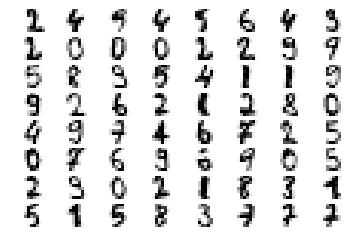

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 100)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []
classes = [[0,2,4,6,8],[0,4,5,8,9],[1,3,4,6,9],[1,2,3,6,7,8,9],[1,4,5,6,7],[1,3,5,7,8],[0,3,4,7,8],[1,2,3,4,5],[0,2,5,7,9],[1,2,5,6,8],[1,2,4,7,9],[0,6,7],[0,2,3],[1,8,9],[0,2,3,4,5,6,7,8,9]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:803
number of class2:814

 ****** Running generation 0 ****** 

Population's average fitness: 0.49806 stdev: 0.07307
Best fitness: 0.67718 - size: (2, 13) - species 3 - id 83
Average adjusted fitness: 0.280
Mean genetic distance 2.903, standard deviation 0.464
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 5.432 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53672 stdev: 0.06840
Best fitness: 0.79035 - size: (3, 15) - species 9 - id 224
Average adjusted fitness: 0.227
Mean genetic distance 2.969, standard deviation 0.459
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 5.540 sec (5.486 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55604 stdev: 0.07955
Best fitness: 0.79035 - size: (3, 15) - species 2 - id 224
Average adjusted fitness: 0.258
Mean genetic distance 3.009, standard deviation 0.449
Population of 204 members in 36 species
Total extinction

Population of 196 members in 30 species
Total extinctions: 0
Generation time: 7.015 sec (6.705 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64747 stdev: 0.10944
Best fitness: 0.84663 - size: (6, 23) - species 20 - id 2209
Average adjusted fitness: 0.229
Mean genetic distance 3.244, standard deviation 0.514
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 7.069 sec (6.752 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65292 stdev: 0.10473
Best fitness: 0.84663 - size: (6, 23) - species 20 - id 2209
Average adjusted fitness: 0.205
Mean genetic distance 3.234, standard deviation 0.500
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 7.366 sec (6.832 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.66447 stdev: 0.10580
Best fitness: 0.84663 - size: (6, 23) - species 20 - id 2209
Average adjusted fitness: 0.208
Mean genetic distance 

Mean genetic distance 3.284, standard deviation 0.549
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 7.466 sec (7.512 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.70004 stdev: 0.10671
Best fitness: 0.84663 - size: (6, 23) - species 20 - id 2209
Average adjusted fitness: 0.299
Mean genetic distance 3.282, standard deviation 0.545
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 7.612 sec (7.545 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.69279 stdev: 0.11111
Best fitness: 0.84663 - size: (6, 23) - species 20 - id 2209
Average adjusted fitness: 0.195
Mean genetic distance 3.296, standard deviation 0.544
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 8.250 sec (7.617 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.67766 stdev: 0.11763
Best fitness: 0.84663 - size: (6, 23) - species 20 - id 2209


Mean genetic distance 3.234, standard deviation 0.578
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 8.669 sec (8.585 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.70089 stdev: 0.11460
Best fitness: 0.85281 - size: (7, 26) - species 20 - id 7357
Average adjusted fitness: 0.233
Mean genetic distance 3.222, standard deviation 0.591
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 9.337 sec (8.696 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.69321 stdev: 0.12407
Best fitness: 0.85281 - size: (7, 26) - species 20 - id 7357
Average adjusted fitness: 0.400
Mean genetic distance 3.232, standard deviation 0.603
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 9.022 sec (8.722 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.70420 stdev: 0.11845
Best fitness: 0.85281 - size: (7, 26) - species 20 - id 7357


Mean genetic distance 3.065, standard deviation 0.566
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 10.460 sec (9.762 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.68145 stdev: 0.12315
Best fitness: 0.86642 - size: (7, 25) - species 58 - id 14296
Average adjusted fitness: 0.296
Mean genetic distance 3.045, standard deviation 0.559
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 10.402 sec (9.842 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.68433 stdev: 0.12631
Best fitness: 0.86642 - size: (7, 25) - species 58 - id 14296
Average adjusted fitness: 0.450
Mean genetic distance 3.085, standard deviation 0.545
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 10.422 sec (9.923 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.69300 stdev: 0.12933
Best fitness: 0.86642 - size: (7, 25) - species 58 - id 

Generation time: 6.497 sec (6.523 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.63120 stdev: 0.10149
Best fitness: 0.82870 - size: (6, 20) - species 6 - id 2564
Average adjusted fitness: 0.253
Mean genetic distance 3.230, standard deviation 0.496
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 6.484 sec (6.533 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62633 stdev: 0.10041
Best fitness: 0.82870 - size: (6, 20) - species 6 - id 2564
Average adjusted fitness: 0.222
Mean genetic distance 3.225, standard deviation 0.502
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 6.495 sec (6.555 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63927 stdev: 0.10084
Best fitness: 0.82870 - size: (6, 20) - species 6 - id 2564
Average adjusted fitness: 0.305
Mean genetic distance 3.207, standard deviation 0.499
Population of 202 members in 27 

Mean genetic distance 3.306, standard deviation 0.562
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 7.837 sec (7.498 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.64576 stdev: 0.10495
Best fitness: 0.83921 - size: (7, 25) - species 6 - id 6272
Average adjusted fitness: 0.257
Mean genetic distance 3.286, standard deviation 0.569
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 7.854 sec (7.565 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.65052 stdev: 0.10134
Best fitness: 0.83921 - size: (7, 25) - species 6 - id 6272
Average adjusted fitness: 0.221
Mean genetic distance 3.295, standard deviation 0.562
Population of 205 members in 23 species
Total extinctions: 0
Generation time: 7.909 sec (7.623 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.64547 stdev: 0.10057
Best fitness: 0.83921 - size: (7, 25) - species 6 - id 6272
Ave

Mean genetic distance 3.201, standard deviation 0.584
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 8.769 sec (8.457 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.64910 stdev: 0.10743
Best fitness: 0.83921 - size: (7, 25) - species 6 - id 6272
Average adjusted fitness: 0.271
Mean genetic distance 3.192, standard deviation 0.591
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 8.874 sec (8.518 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.64060 stdev: 0.10974
Best fitness: 0.83921 - size: (7, 25) - species 6 - id 6272
Average adjusted fitness: 0.211
Mean genetic distance 3.154, standard deviation 0.621
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 8.617 sec (8.552 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.65291 stdev: 0.10313
Best fitness: 0.83921 - size: (7, 25) - species 6 - id 6272
Ave

Mean genetic distance 3.141, standard deviation 0.616
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 9.236 sec (9.228 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.66164 stdev: 0.10979
Best fitness: 0.84354 - size: (8, 27) - species 6 - id 11772
Average adjusted fitness: 0.317
Mean genetic distance 3.148, standard deviation 0.580
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 9.018 sec (9.193 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.66388 stdev: 0.10680
Best fitness: 0.84354 - size: (8, 27) - species 6 - id 11772
Average adjusted fitness: 0.233
Mean genetic distance 3.127, standard deviation 0.596
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 9.044 sec (9.096 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.64929 stdev: 0.10942
Best fitness: 0.84354 - size: (8, 27) - species 6 - id 11772


Mean genetic distance 3.254, standard deviation 0.471
Population of 192 members in 40 species
Total extinctions: 0
Generation time: 6.785 sec (6.564 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60422 stdev: 0.07548
Best fitness: 0.76005 - size: (4, 16) - species 30 - id 1075
Average adjusted fitness: 0.197
Mean genetic distance 3.260, standard deviation 0.486
Population of 189 members in 37 species
Total extinctions: 0
Generation time: 6.504 sec (6.611 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60442 stdev: 0.07777
Best fitness: 0.76005 - size: (4, 16) - species 30 - id 1075
Average adjusted fitness: 0.188
Mean genetic distance 3.254, standard deviation 0.471
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 6.571 sec (6.622 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60489 stdev: 0.08015
Best fitness: 0.77118 - size: (5, 18) - species 30 - id 2712


Mean genetic distance 3.233, standard deviation 0.511
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 8.020 sec (7.633 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.60489 stdev: 0.07692
Best fitness: 0.78664 - size: (6, 20) - species 30 - id 4311
Average adjusted fitness: 0.184
Mean genetic distance 3.240, standard deviation 0.520
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 7.892 sec (7.720 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.61302 stdev: 0.07888
Best fitness: 0.78664 - size: (6, 20) - species 30 - id 4311
Average adjusted fitness: 0.158
Mean genetic distance 3.233, standard deviation 0.504
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 7.692 sec (7.772 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.61370 stdev: 0.07896
Best fitness: 0.78664 - size: (6, 20) - species 30 - id 4311


Mean genetic distance 3.186, standard deviation 0.547
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 8.190 sec (8.096 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.62418 stdev: 0.07857
Best fitness: 0.78664 - size: (6, 20) - species 30 - id 4311
Average adjusted fitness: 0.168
Mean genetic distance 3.147, standard deviation 0.559
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 8.322 sec (8.148 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.61306 stdev: 0.08114
Best fitness: 0.78664 - size: (6, 20) - species 30 - id 4311
Average adjusted fitness: 0.197
Mean genetic distance 3.132, standard deviation 0.566
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 8.301 sec (8.184 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.61972 stdev: 0.07509
Best fitness: 0.78664 - size: (6, 20) - species 30 - id 4311


Mean genetic distance 3.165, standard deviation 0.535
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 8.980 sec (8.952 average)

 ****** Running generation 90 ****** 

Population's average fitness: 0.62087 stdev: 0.08548
Best fitness: 0.79344 - size: (7, 23) - species 30 - id 13530
Average adjusted fitness: 0.231
Mean genetic distance 3.171, standard deviation 0.548
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 8.983 sec (8.998 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.61634 stdev: 0.08481
Best fitness: 0.79344 - size: (7, 23) - species 30 - id 13530
Average adjusted fitness: 0.235
Mean genetic distance 3.139, standard deviation 0.572
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 8.969 sec (9.011 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.62137 stdev: 0.07518
Best fitness: 0.79344 - size: (7, 23) - species 30 - id 135

Mean genetic distance 3.129, standard deviation 0.497
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 6.870 sec (6.465 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68113 stdev: 0.13653
Best fitness: 0.84601 - size: (2, 13) - species 11 - id 114
Average adjusted fitness: 0.478
Mean genetic distance 3.113, standard deviation 0.494
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 6.743 sec (6.537 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66845 stdev: 0.14766
Best fitness: 0.84601 - size: (2, 13) - species 11 - id 114
Average adjusted fitness: 0.371
Mean genetic distance 3.133, standard deviation 0.497
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 6.903 sec (6.616 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.67825 stdev: 0.14489
Best fitness: 0.84601 - size: (2, 13) - species 11 - id 114
Ave

Mean genetic distance 3.180, standard deviation 0.568
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 7.910 sec (7.698 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.70912 stdev: 0.14123
Best fitness: 0.87137 - size: (8, 25) - species 36 - id 5143
Average adjusted fitness: 0.408
Mean genetic distance 3.232, standard deviation 0.564
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 8.219 sec (7.784 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.68219 stdev: 0.16414
Best fitness: 0.87137 - size: (8, 25) - species 36 - id 5143
Average adjusted fitness: 0.379
Mean genetic distance 3.200, standard deviation 0.572
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 7.978 sec (7.833 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.70988 stdev: 0.13653
Best fitness: 0.87137 - size: (8, 27) - species 10 - id 5427


Mean genetic distance 3.125, standard deviation 0.604
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 8.912 sec (8.978 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.71127 stdev: 0.14554
Best fitness: 0.89239 - size: (10, 31) - species 10 - id 6711
Average adjusted fitness: 0.419
Mean genetic distance 3.108, standard deviation 0.597
Population of 206 members in 17 species
Total extinctions: 0
Generation time: 9.019 sec (8.980 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.68719 stdev: 0.15944
Best fitness: 0.89239 - size: (10, 31) - species 10 - id 6711
Average adjusted fitness: 0.465
Mean genetic distance 3.144, standard deviation 0.593
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 9.503 sec (9.034 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.70203 stdev: 0.14408
Best fitness: 0.89239 - size: (10, 31) - species 10 - id 67

Mean genetic distance 3.103, standard deviation 0.594
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 11.368 sec (10.953 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.66712 stdev: 0.16796
Best fitness: 0.89549 - size: (11, 30) - species 56 - id 10070
Average adjusted fitness: 0.380
Mean genetic distance 3.092, standard deviation 0.611
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 11.220 sec (11.052 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.68599 stdev: 0.15883
Best fitness: 0.89549 - size: (11, 30) - species 56 - id 10070
Average adjusted fitness: 0.375
Mean genetic distance 3.049, standard deviation 0.617
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 11.208 sec (11.099 average)

 ****** Running generation 88 ****** 

Population's average fitness: 0.69331 stdev: 0.15206
Best fitness: 0.89549 - size: (11, 30) - species 56

Mean genetic distance 3.119, standard deviation 0.473
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 6.220 sec (5.937 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61637 stdev: 0.09728
Best fitness: 0.79716 - size: (3, 15) - species 5 - id 1208
Average adjusted fitness: 0.268
Mean genetic distance 3.127, standard deviation 0.481
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 6.721 sec (6.096 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61447 stdev: 0.09860
Best fitness: 0.79716 - size: (3, 15) - species 5 - id 1208
Average adjusted fitness: 0.270
Mean genetic distance 3.146, standard deviation 0.466
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 6.717 sec (6.209 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62086 stdev: 0.09493
Best fitness: 0.79716 - size: (3, 15) - species 5 - id 1208
Ave

Mean genetic distance 3.261, standard deviation 0.522
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 7.502 sec (7.236 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.64868 stdev: 0.10550
Best fitness: 0.81200 - size: (9, 27) - species 12 - id 2474
Average adjusted fitness: 0.359
Mean genetic distance 3.288, standard deviation 0.508
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 7.436 sec (7.271 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.65506 stdev: 0.09772
Best fitness: 0.81200 - size: (9, 27) - species 12 - id 2474
Average adjusted fitness: 0.241
Mean genetic distance 3.272, standard deviation 0.512
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 7.779 sec (7.357 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.66062 stdev: 0.09534
Best fitness: 0.81200 - size: (9, 27) - species 12 - id 2474


Total extinctions: 0
Generation time: 7.552 sec (7.612 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.67563 stdev: 0.10655
Best fitness: 0.84725 - size: (10, 30) - species 49 - id 7647
Average adjusted fitness: 0.392
Mean genetic distance 3.356, standard deviation 0.564
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 7.682 sec (7.603 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.65321 stdev: 0.10074
Best fitness: 0.84725 - size: (10, 30) - species 49 - id 7647
Average adjusted fitness: 0.212
Mean genetic distance 3.333, standard deviation 0.558
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 7.476 sec (7.578 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.66768 stdev: 0.10446
Best fitness: 0.84725 - size: (10, 30) - species 49 - id 7647
Average adjusted fitness: 0.250
Mean genetic distance 3.298, standard deviation 0.563
Popul

Population's average fitness: 0.69982 stdev: 0.09673
Best fitness: 0.85343 - size: (9, 30) - species 45 - id 12321
Average adjusted fitness: 0.205
Mean genetic distance 3.051, standard deviation 0.577
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 8.179 sec (7.956 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.69009 stdev: 0.10842
Best fitness: 0.85343 - size: (9, 30) - species 45 - id 12321
Average adjusted fitness: 0.361
Mean genetic distance 3.083, standard deviation 0.572
Population of 205 members in 15 species
Total extinctions: 0
Generation time: 7.811 sec (7.942 average)

 ****** Running generation 84 ****** 

Population's average fitness: 0.68823 stdev: 0.10393
Best fitness: 0.85343 - size: (9, 30) - species 45 - id 12321
Average adjusted fitness: 0.200
Mean genetic distance 3.074, standard deviation 0.573
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 8.470 sec (8.019 average)

 ***

Population's average fitness: 0.59312 stdev: 0.08148
Best fitness: 0.77180 - size: (4, 16) - species 21 - id 798
Average adjusted fitness: 0.254
Mean genetic distance 3.169, standard deviation 0.476
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 6.324 sec (5.793 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60428 stdev: 0.07892
Best fitness: 0.77180 - size: (4, 16) - species 21 - id 798
Average adjusted fitness: 0.163
Mean genetic distance 3.193, standard deviation 0.475
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 6.362 sec (5.864 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60604 stdev: 0.08565
Best fitness: 0.77489 - size: (7, 22) - species 9 - id 1336
Average adjusted fitness: 0.286
Mean genetic distance 3.213, standard deviation 0.470
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 6.473 sec (5.932 average)

 ****** Runn

Population's average fitness: 0.65237 stdev: 0.09236
Best fitness: 0.82560 - size: (8, 26) - species 1 - id 3816
Average adjusted fitness: 0.186
Mean genetic distance 3.330, standard deviation 0.473
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 7.181 sec (7.204 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.64892 stdev: 0.09638
Best fitness: 0.82560 - size: (8, 26) - species 1 - id 3816
Average adjusted fitness: 0.198
Mean genetic distance 3.323, standard deviation 0.476
Population of 191 members in 36 species
Total extinctions: 0
Generation time: 7.395 sec (7.238 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.64835 stdev: 0.10094
Best fitness: 0.82560 - size: (8, 26) - species 1 - id 3816
Average adjusted fitness: 0.326
Mean genetic distance 3.332, standard deviation 0.483
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 7.154 sec (7.255 average)

 ****** Ru

Mean genetic distance 3.270, standard deviation 0.526
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 7.702 sec (7.915 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.64578 stdev: 0.10010
Best fitness: 0.82560 - size: (8, 26) - species 1 - id 3816
Average adjusted fitness: 0.211
Mean genetic distance 3.289, standard deviation 0.541
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 7.862 sec (7.905 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.65498 stdev: 0.09695
Best fitness: 0.82560 - size: (8, 26) - species 1 - id 3816
Average adjusted fitness: 0.286
Mean genetic distance 3.282, standard deviation 0.531
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 8.000 sec (7.888 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.64879 stdev: 0.10265
Best fitness: 0.82560 - size: (8, 26) - species 1 - id 3816
Ave

Mean genetic distance 3.221, standard deviation 0.590
Population of 205 members in 14 species
Total extinctions: 0
Generation time: 9.015 sec (8.755 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.64420 stdev: 0.10393
Best fitness: 0.83364 - size: (9, 29) - species 1 - id 8218
Average adjusted fitness: 0.195
Mean genetic distance 3.229, standard deviation 0.578
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 9.220 sec (8.832 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.65195 stdev: 0.10181
Best fitness: 0.83364 - size: (9, 29) - species 1 - id 8218
Average adjusted fitness: 0.243
Mean genetic distance 3.236, standard deviation 0.591
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 9.040 sec (8.880 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.65082 stdev: 0.10211
Best fitness: 0.83364 - size: (9, 29) - species 1 - id 8218
Ave

Total extinctions: 0
Generation time: 5.736 sec (5.434 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55106 stdev: 0.06193
Best fitness: 0.71985 - size: (2, 13) - species 6 - id 504
Average adjusted fitness: 0.130
Mean genetic distance 3.074, standard deviation 0.482
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 5.883 sec (5.546 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55803 stdev: 0.06636
Best fitness: 0.71985 - size: (2, 13) - species 6 - id 504
Average adjusted fitness: 0.161
Mean genetic distance 3.072, standard deviation 0.488
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 6.098 sec (5.656 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57105 stdev: 0.06929
Best fitness: 0.71985 - size: (2, 13) - species 6 - id 504
Average adjusted fitness: 0.135
Mean genetic distance 3.068, standard deviation 0.490
Population of 198

Population's average fitness: 0.59721 stdev: 0.07707
Best fitness: 0.75572 - size: (7, 19) - species 45 - id 3152
Average adjusted fitness: 0.175
Mean genetic distance 3.175, standard deviation 0.498
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 7.061 sec (6.718 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.59635 stdev: 0.07828
Best fitness: 0.75572 - size: (7, 19) - species 45 - id 3152
Average adjusted fitness: 0.205
Mean genetic distance 3.183, standard deviation 0.510
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 7.024 sec (6.770 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.59247 stdev: 0.08025
Best fitness: 0.75572 - size: (7, 19) - species 45 - id 3152
Average adjusted fitness: 0.232
Mean genetic distance 3.195, standard deviation 0.487
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.941 sec (6.809 average)

 ******

Mean genetic distance 3.247, standard deviation 0.566
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 7.621 sec (7.594 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.61225 stdev: 0.08173
Best fitness: 0.80025 - size: (6, 23) - species 21 - id 5153
Average adjusted fitness: 0.220
Mean genetic distance 3.250, standard deviation 0.549
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 7.837 sec (7.650 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.60780 stdev: 0.08051
Best fitness: 0.80025 - size: (6, 23) - species 21 - id 5153
Average adjusted fitness: 0.164
Mean genetic distance 3.250, standard deviation 0.576
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 7.610 sec (7.628 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.61689 stdev: 0.08774
Best fitness: 0.80025 - size: (6, 23) - species 21 - id 5153


Population of 203 members in 15 species
Total extinctions: 0
Generation time: 7.832 sec (7.852 average)

 ****** Running generation 76 ****** 

Population's average fitness: 0.60314 stdev: 0.08028
Best fitness: 0.81571 - size: (7, 25) - species 21 - id 9596
Average adjusted fitness: 0.189
Mean genetic distance 3.152, standard deviation 0.580
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 8.340 sec (7.926 average)

 ****** Running generation 77 ****** 

Population's average fitness: 0.59461 stdev: 0.08627
Best fitness: 0.81571 - size: (7, 25) - species 21 - id 9596
Average adjusted fitness: 0.178
Mean genetic distance 3.086, standard deviation 0.529
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 7.971 sec (7.977 average)

 ****** Running generation 78 ****** 

Population's average fitness: 0.58673 stdev: 0.08797
Best fitness: 0.82004 - size: (7, 25) - species 21 - id 11485
Average adjusted fitness: 0.302
Mean genetic distance

Total extinctions: 0
Generation time: 8.714 sec (8.512 average)
number of class1:813
number of class2:804

 ****** Running generation 0 ****** 

Population's average fitness: 0.50092 stdev: 0.05134
Best fitness: 0.68893 - size: (2, 13) - species 6 - id 120
Average adjusted fitness: 0.179
Mean genetic distance 2.958, standard deviation 0.493
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.072 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52735 stdev: 0.06628
Best fitness: 0.71243 - size: (3, 15) - species 14 - id 368
Average adjusted fitness: 0.212
Mean genetic distance 3.051, standard deviation 0.486
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 5.487 sec (5.279 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54672 stdev: 0.06182
Best fitness: 0.71243 - size: (3, 15) - species 14 - id 368
Average adjusted fitness: 0.131
Mean genetic distance 3.052, standard devia

Population of 192 members in 26 species
Total extinctions: 0
Generation time: 7.655 sec (7.607 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.62268 stdev: 0.08236
Best fitness: 0.76809 - size: (8, 25) - species 38 - id 5292
Average adjusted fitness: 0.167
Mean genetic distance 3.373, standard deviation 0.537
Population of 205 members in 23 species
Total extinctions: 0
Generation time: 7.609 sec (7.621 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.62393 stdev: 0.08684
Best fitness: 0.77056 - size: (5, 21) - species 50 - id 6573
Average adjusted fitness: 0.235
Mean genetic distance 3.385, standard deviation 0.534
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 8.227 sec (7.700 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.61809 stdev: 0.08658
Best fitness: 0.77056 - size: (5, 21) - species 50 - id 6573
Average adjusted fitness: 0.178
Mean genetic distance 

Mean genetic distance 3.330, standard deviation 0.574
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 8.722 sec (8.620 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.62917 stdev: 0.08967
Best fitness: 0.79097 - size: (10, 28) - species 38 - id 8466
Average adjusted fitness: 0.188
Mean genetic distance 3.368, standard deviation 0.574
Population of 204 members in 19 species
Total extinctions: 0
Generation time: 9.101 sec (8.694 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.62552 stdev: 0.09739
Best fitness: 0.79097 - size: (10, 28) - species 38 - id 8466
Average adjusted fitness: 0.222
Mean genetic distance 3.361, standard deviation 0.571
Population of 204 members in 19 species
Total extinctions: 0
Generation time: 9.449 sec (8.792 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.62572 stdev: 0.09405
Best fitness: 0.79097 - size: (10, 28) - species 38 - id 84

Mean genetic distance 3.075, standard deviation 0.580
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 8.301 sec (8.452 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.61876 stdev: 0.09239
Best fitness: 0.79097 - size: (10, 28) - species 38 - id 8466
Average adjusted fitness: 0.214
Mean genetic distance 3.109, standard deviation 0.584
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 8.410 sec (8.428 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.63052 stdev: 0.09034
Best fitness: 0.79097 - size: (10, 28) - species 38 - id 8466
Average adjusted fitness: 0.184
Mean genetic distance 3.105, standard deviation 0.589
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 8.933 sec (8.461 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.62256 stdev: 0.09149
Best fitness: 0.79097 - size: (10, 28) - species 38 - id 84

Mean genetic distance 3.234, standard deviation 0.473
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 6.985 sec (6.755 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61736 stdev: 0.07701
Best fitness: 0.81509 - size: (7, 21) - species 17 - id 2819
Average adjusted fitness: 0.195
Mean genetic distance 3.224, standard deviation 0.465
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 6.833 sec (6.769 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.61123 stdev: 0.07986
Best fitness: 0.81509 - size: (7, 21) - species 17 - id 2819
Average adjusted fitness: 0.188
Mean genetic distance 3.231, standard deviation 0.466
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.134 sec (6.807 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62134 stdev: 0.07975
Best fitness: 0.81509 - size: (7, 21) - species 17 - id 2819


Population of 196 members in 19 species
Total extinctions: 0
Generation time: 7.932 sec (7.570 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.61282 stdev: 0.08882
Best fitness: 0.81509 - size: (7, 21) - species 17 - id 2819
Average adjusted fitness: 0.199
Mean genetic distance 3.196, standard deviation 0.515
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 7.985 sec (7.657 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.62066 stdev: 0.09026
Best fitness: 0.81509 - size: (7, 21) - species 17 - id 2819
Average adjusted fitness: 0.231
Mean genetic distance 3.200, standard deviation 0.515
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 8.300 sec (7.806 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.62644 stdev: 0.08439
Best fitness: 0.81509 - size: (7, 21) - species 17 - id 2819
Average adjusted fitness: 0.203
Mean genetic distance 

Mean genetic distance 3.169, standard deviation 0.553
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 9.558 sec (8.764 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.63042 stdev: 0.09461
Best fitness: 0.81509 - size: (7, 21) - species 17 - id 2819
Average adjusted fitness: 0.178
Mean genetic distance 3.194, standard deviation 0.556
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 9.493 sec (8.875 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.63626 stdev: 0.08825
Best fitness: 0.81509 - size: (7, 21) - species 17 - id 2819
Average adjusted fitness: 0.196
Mean genetic distance 3.189, standard deviation 0.556
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 9.337 sec (8.961 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.62879 stdev: 0.09612
Best fitness: 0.81509 - size: (7, 21) - species 17 - id 2819


Mean genetic distance 3.124, standard deviation 0.580
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 9.457 sec (9.394 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.65943 stdev: 0.08743
Best fitness: 0.81509 - size: (7, 21) - species 17 - id 2819
Average adjusted fitness: 0.199
Mean genetic distance 3.120, standard deviation 0.601
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 9.652 sec (9.428 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.64840 stdev: 0.09634
Best fitness: 0.81509 - size: (7, 21) - species 17 - id 2819
Average adjusted fitness: 0.261
Mean genetic distance 3.089, standard deviation 0.602
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 9.627 sec (9.432 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.65850 stdev: 0.09438
Best fitness: 0.81509 - size: (7, 21) - species 17 - id 2819


Mean genetic distance 3.232, standard deviation 0.527
Population of 190 members in 45 species
Total extinctions: 0
Generation time: 6.574 sec (6.437 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61965 stdev: 0.10314
Best fitness: 0.80519 - size: (6, 18) - species 6 - id 2049
Average adjusted fitness: 0.263
Mean genetic distance 3.255, standard deviation 0.524
Population of 195 members in 44 species
Total extinctions: 0
Generation time: 6.241 sec (6.469 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62807 stdev: 0.09994
Best fitness: 0.80519 - size: (6, 18) - species 6 - id 2049
Average adjusted fitness: 0.282
Mean genetic distance 3.222, standard deviation 0.525
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 6.440 sec (6.492 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62706 stdev: 0.10314
Best fitness: 0.80519 - size: (6, 18) - species 6 - id 2049
Ave

Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.172 sec (7.033 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.64995 stdev: 0.11327
Best fitness: 0.85714 - size: (6, 19) - species 6 - id 2713
Average adjusted fitness: 0.351
Mean genetic distance 3.227, standard deviation 0.547
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 7.917 sec (7.132 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.66305 stdev: 0.11676
Best fitness: 0.85714 - size: (6, 19) - species 6 - id 2713
Average adjusted fitness: 0.283
Mean genetic distance 3.259, standard deviation 0.551
Population of 192 members in 25 species
Total extinctions: 0
Generation time: 7.083 sec (7.139 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.64514 stdev: 0.11706
Best fitness: 0.85714 - size: (6, 19) - species 6 - id 2713
Average adjusted fitness: 0.248
Mean genetic distance 3.2

Population of 197 members in 20 species
Total extinctions: 0
Generation time: 7.598 sec (7.308 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.66236 stdev: 0.11848
Best fitness: 0.85714 - size: (6, 19) - species 6 - id 2713
Average adjusted fitness: 0.327
Mean genetic distance 3.296, standard deviation 0.522
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 7.289 sec (7.304 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.65618 stdev: 0.11867
Best fitness: 0.85714 - size: (6, 19) - species 6 - id 2713
Average adjusted fitness: 0.309
Mean genetic distance 3.271, standard deviation 0.540
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 7.326 sec (7.326 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.65647 stdev: 0.11835
Best fitness: 0.85714 - size: (6, 19) - species 6 - id 2713
Average adjusted fitness: 0.275
Mean genetic distance 3.2

Mean genetic distance 3.231, standard deviation 0.554
Population of 192 members in 19 species
Total extinctions: 0
Generation time: 7.838 sec (7.849 average)

 ****** Running generation 88 ****** 

Population's average fitness: 0.68996 stdev: 0.11553
Best fitness: 0.86024 - size: (7, 19) - species 6 - id 10299
Average adjusted fitness: 0.264
Mean genetic distance 3.220, standard deviation 0.580
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 7.432 sec (7.799 average)

 ****** Running generation 89 ****** 

Population's average fitness: 0.68428 stdev: 0.11158
Best fitness: 0.86024 - size: (7, 19) - species 6 - id 10299
Average adjusted fitness: 0.222
Mean genetic distance 3.196, standard deviation 0.552
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 7.776 sec (7.789 average)

 ****** Running generation 90 ****** 

Population's average fitness: 0.69075 stdev: 0.10689
Best fitness: 0.86024 - size: (7, 19) - species 6 - id 10299


Mean genetic distance 3.233, standard deviation 0.466
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 6.629 sec (6.202 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60146 stdev: 0.06938
Best fitness: 0.75943 - size: (6, 19) - species 7 - id 1859
Average adjusted fitness: 0.139
Mean genetic distance 3.212, standard deviation 0.463
Population of 193 members in 45 species
Total extinctions: 0
Generation time: 6.791 sec (6.317 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59823 stdev: 0.07796
Best fitness: 0.75943 - size: (6, 19) - species 7 - id 1859
Average adjusted fitness: 0.291
Mean genetic distance 3.214, standard deviation 0.475
Population of 195 members in 46 species
Total extinctions: 0
Generation time: 6.465 sec (6.381 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59763 stdev: 0.07380
Best fitness: 0.75943 - size: (6, 19) - species 7 - id 1859
Ave

Mean genetic distance 3.134, standard deviation 0.507
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 7.383 sec (7.228 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.61652 stdev: 0.07281
Best fitness: 0.75943 - size: (6, 19) - species 7 - id 1859
Average adjusted fitness: 0.150
Mean genetic distance 3.169, standard deviation 0.504
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.502 sec (7.368 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.60987 stdev: 0.08368
Best fitness: 0.75943 - size: (6, 19) - species 7 - id 1859
Average adjusted fitness: 0.307
Mean genetic distance 3.170, standard deviation 0.506
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 8.024 sec (7.435 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.61199 stdev: 0.07706
Best fitness: 0.75943 - size: (6, 19) - species 7 - id 1859
Ave

Mean genetic distance 3.195, standard deviation 0.555
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 8.616 sec (8.372 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.61521 stdev: 0.08376
Best fitness: 0.80891 - size: (11, 28) - species 57 - id 7919
Average adjusted fitness: 0.263
Mean genetic distance 3.201, standard deviation 0.561
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 8.942 sec (8.453 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.61269 stdev: 0.08758
Best fitness: 0.80891 - size: (11, 28) - species 57 - id 7919
Average adjusted fitness: 0.230
Mean genetic distance 3.262, standard deviation 0.560
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 8.523 sec (8.490 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.61425 stdev: 0.08646
Best fitness: 0.80891 - size: (11, 28) - species 57 - id 79

Mean genetic distance 3.286, standard deviation 0.606
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 10.001 sec (9.579 average)

 ****** Running generation 84 ****** 

Population's average fitness: 0.61159 stdev: 0.09256
Best fitness: 0.81447 - size: (9, 25) - species 53 - id 11028
Average adjusted fitness: 0.148
Mean genetic distance 3.291, standard deviation 0.603
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 10.067 sec (9.657 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.61821 stdev: 0.09301
Best fitness: 0.81447 - size: (9, 25) - species 53 - id 11028
Average adjusted fitness: 0.179
Mean genetic distance 3.295, standard deviation 0.607
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 10.227 sec (9.716 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.61440 stdev: 0.09270
Best fitness: 0.81447 - size: (9, 25) - species 53 - id 

Total extinctions: 0
Generation time: 6.215 sec (5.886 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.67070 stdev: 0.11434
Best fitness: 0.80705 - size: (4, 17) - species 26 - id 1126
Average adjusted fitness: 0.369
Mean genetic distance 3.134, standard deviation 0.534
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.441 sec (5.947 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66554 stdev: 0.13059
Best fitness: 0.81323 - size: (4, 18) - species 6 - id 1485
Average adjusted fitness: 0.401
Mean genetic distance 3.115, standard deviation 0.511
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 6.617 sec (6.014 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67826 stdev: 0.11463
Best fitness: 0.81323 - size: (4, 18) - species 6 - id 1485
Average adjusted fitness: 0.445
Mean genetic distance 3.103, standard deviation 0.517
Population o

Population's average fitness: 0.70204 stdev: 0.10695
Best fitness: 0.85405 - size: (11, 35) - species 16 - id 4342
Average adjusted fitness: 0.403
Mean genetic distance 3.269, standard deviation 0.491
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.703 sec (7.324 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.70579 stdev: 0.11011
Best fitness: 0.85405 - size: (11, 35) - species 16 - id 4342
Average adjusted fitness: 0.408
Mean genetic distance 3.249, standard deviation 0.499
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 7.557 sec (7.376 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.70569 stdev: 0.11713
Best fitness: 0.85405 - size: (11, 35) - species 16 - id 4342
Average adjusted fitness: 0.429
Mean genetic distance 3.230, standard deviation 0.515
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 7.740 sec (7.443 average)

 ***

Total extinctions: 0
Generation time: 8.039 sec (7.751 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.70758 stdev: 0.11251
Best fitness: 0.85838 - size: (13, 40) - species 16 - id 8333
Average adjusted fitness: 0.486
Mean genetic distance 3.197, standard deviation 0.592
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 7.978 sec (7.784 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.71541 stdev: 0.10259
Best fitness: 0.85838 - size: (13, 40) - species 16 - id 8333
Average adjusted fitness: 0.399
Mean genetic distance 3.229, standard deviation 0.584
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 7.752 sec (7.801 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.69798 stdev: 0.12632
Best fitness: 0.85838 - size: (13, 40) - species 16 - id 8333
Average adjusted fitness: 0.389
Mean genetic distance 3.229, standard deviation 0.584
Popul

Population's average fitness: 0.70778 stdev: 0.12075
Best fitness: 0.87322 - size: (13, 40) - species 16 - id 9695
Average adjusted fitness: 0.425
Mean genetic distance 3.252, standard deviation 0.546
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 8.939 sec (8.564 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.70733 stdev: 0.12074
Best fitness: 0.87322 - size: (13, 40) - species 16 - id 9695
Average adjusted fitness: 0.443
Mean genetic distance 3.268, standard deviation 0.552
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 8.552 sec (8.561 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.71453 stdev: 0.12204
Best fitness: 0.87322 - size: (13, 40) - species 16 - id 9695
Average adjusted fitness: 0.480
Mean genetic distance 3.234, standard deviation 0.552
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 8.863 sec (8.603 average)

 ***

Population of 204 members in 40 species
Total extinctions: 0
Generation time: 5.993 sec (5.704 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.67104 stdev: 0.11268
Best fitness: 0.78912 - size: (4, 17) - species 23 - id 862
Average adjusted fitness: 0.368
Mean genetic distance 3.091, standard deviation 0.482
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 6.197 sec (5.774 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.67996 stdev: 0.10274
Best fitness: 0.78912 - size: (4, 17) - species 23 - id 862
Average adjusted fitness: 0.425
Mean genetic distance 3.109, standard deviation 0.478
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 5.874 sec (5.787 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68794 stdev: 0.09272
Best fitness: 0.79035 - size: (4, 16) - species 28 - id 1225
Average adjusted fitness: 0.384
Mean genetic distance 3.133

Mean genetic distance 3.221, standard deviation 0.499
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 7.149 sec (6.865 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.68331 stdev: 0.13083
Best fitness: 0.84848 - size: (8, 26) - species 27 - id 3803
Average adjusted fitness: 0.379
Mean genetic distance 3.259, standard deviation 0.507
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 6.704 sec (6.871 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.71498 stdev: 0.09484
Best fitness: 0.84848 - size: (8, 26) - species 27 - id 3803
Average adjusted fitness: 0.387
Mean genetic distance 3.247, standard deviation 0.497
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 7.027 sec (6.846 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.71468 stdev: 0.10468
Best fitness: 0.86333 - size: (7, 25) - species 27 - id 4230


Mean genetic distance 3.222, standard deviation 0.543
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 8.307 sec (7.887 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.70646 stdev: 0.13547
Best fitness: 0.87384 - size: (9, 31) - species 27 - id 6572
Average adjusted fitness: 0.406
Mean genetic distance 3.248, standard deviation 0.536
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 8.239 sec (7.955 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.68572 stdev: 0.14216
Best fitness: 0.87631 - size: (9, 31) - species 27 - id 7697
Average adjusted fitness: 0.394
Mean genetic distance 3.249, standard deviation 0.544
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 8.310 sec (8.016 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.71889 stdev: 0.10774
Best fitness: 0.87631 - size: (9, 31) - species 27 - id 7697


Mean genetic distance 3.270, standard deviation 0.535
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 8.838 sec (8.846 average)

 ****** Running generation 78 ****** 

Population's average fitness: 0.68780 stdev: 0.12512
Best fitness: 0.87817 - size: (11, 36) - species 27 - id 10307
Average adjusted fitness: 0.382
Mean genetic distance 3.251, standard deviation 0.526
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 8.840 sec (8.866 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.69180 stdev: 0.12001
Best fitness: 0.87817 - size: (11, 36) - species 27 - id 10307
Average adjusted fitness: 0.395
Mean genetic distance 3.234, standard deviation 0.532
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 8.980 sec (8.915 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.69436 stdev: 0.11793
Best fitness: 0.87817 - size: (11, 36) - species 27 - id 

Population's average fitness: 0.62362 stdev: 0.12511
Best fitness: 0.75696 - size: (3, 14) - species 3 - id 359
Average adjusted fitness: 0.314
Mean genetic distance 3.011, standard deviation 0.442
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 5.791 sec (5.445 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.63828 stdev: 0.12119
Best fitness: 0.76871 - size: (4, 17) - species 17 - id 568
Average adjusted fitness: 0.325
Mean genetic distance 3.033, standard deviation 0.438
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 5.888 sec (5.556 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65710 stdev: 0.10016
Best fitness: 0.76871 - size: (4, 17) - species 17 - id 568
Average adjusted fitness: 0.353
Mean genetic distance 3.016, standard deviation 0.435
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 6.076 sec (5.660 average)

 ****** Runni

Mean genetic distance 3.118, standard deviation 0.469
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 7.363 sec (7.049 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.67148 stdev: 0.10915
Best fitness: 0.79839 - size: (4, 15) - species 20 - id 3552
Average adjusted fitness: 0.393
Mean genetic distance 3.114, standard deviation 0.464
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 7.439 sec (7.112 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.68357 stdev: 0.09539
Best fitness: 0.79839 - size: (4, 15) - species 20 - id 3552
Average adjusted fitness: 0.386
Mean genetic distance 3.090, standard deviation 0.480
Population of 208 members in 29 species
Total extinctions: 0
Generation time: 7.386 sec (7.147 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.68197 stdev: 0.09244
Best fitness: 0.79839 - size: (4, 15) - species 20 - id 3552


Population of 203 members in 21 species
Total extinctions: 0
Generation time: 7.655 sec (7.326 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.67684 stdev: 0.10276
Best fitness: 0.79839 - size: (4, 15) - species 20 - id 3552
Average adjusted fitness: 0.378
Mean genetic distance 3.177, standard deviation 0.540
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 7.877 sec (7.352 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.68602 stdev: 0.09277
Best fitness: 0.79839 - size: (4, 15) - species 20 - id 3552
Average adjusted fitness: 0.386
Mean genetic distance 3.169, standard deviation 0.547
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 7.340 sec (7.364 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.67796 stdev: 0.10061
Best fitness: 0.80458 - size: (7, 23) - species 45 - id 7561
Average adjusted fitness: 0.377
Mean genetic distance 

Mean genetic distance 3.125, standard deviation 0.618
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 8.283 sec (8.306 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.69574 stdev: 0.07596
Best fitness: 0.81880 - size: (12, 34) - species 62 - id 11314
Average adjusted fitness: 0.332
Mean genetic distance 3.129, standard deviation 0.631
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 8.876 sec (8.356 average)

 ****** Running generation 76 ****** 

Population's average fitness: 0.70306 stdev: 0.08038
Best fitness: 0.81880 - size: (12, 34) - species 62 - id 11314
Average adjusted fitness: 0.404
Mean genetic distance 3.139, standard deviation 0.641
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 8.261 sec (8.366 average)

 ****** Running generation 77 ****** 

Population's average fitness: 0.69618 stdev: 0.10294
Best fitness: 0.81880 - size: (12, 34) - species 62 - id 

Mean genetic distance 3.197, standard deviation 0.626
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 9.613 sec (9.216 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.69972 stdev: 0.08692
Best fitness: 0.83302 - size: (11, 31) - species 69 - id 14912
Average adjusted fitness: 0.380
Mean genetic distance 3.188, standard deviation 0.679
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 9.411 sec (9.241 average)
number of class1:1454
number of class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.41287 stdev: 0.28994
Best fitness: 0.90291 - size: (2, 13) - species 4 - id 108
Average adjusted fitness: 0.336
Mean genetic distance 2.937, standard deviation 0.490
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 5.219 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.66336 stdev: 0.24884
Best fitness: 0.90847 - size: (3, 15

Population's average fitness: 0.76634 stdev: 0.23489
Best fitness: 0.93630 - size: (4, 16) - species 36 - id 3215
Average adjusted fitness: 0.659
Mean genetic distance 3.136, standard deviation 0.504
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 6.551 sec (6.454 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.77721 stdev: 0.23026
Best fitness: 0.93630 - size: (4, 16) - species 36 - id 3215
Average adjusted fitness: 0.672
Mean genetic distance 3.162, standard deviation 0.501
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 6.761 sec (6.490 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.78584 stdev: 0.22364
Best fitness: 0.93630 - size: (4, 16) - species 36 - id 3215
Average adjusted fitness: 0.685
Mean genetic distance 3.187, standard deviation 0.515
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 6.770 sec (6.538 average)

 ******

Mean genetic distance 3.043, standard deviation 0.634
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 8.640 sec (8.510 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.72572 stdev: 0.24907
Best fitness: 0.94867 - size: (12, 34) - species 38 - id 9750
Average adjusted fitness: 0.608
Mean genetic distance 3.062, standard deviation 0.636
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 9.021 sec (8.573 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.73207 stdev: 0.25839
Best fitness: 0.94867 - size: (12, 34) - species 38 - id 9750
Average adjusted fitness: 0.638
Mean genetic distance 3.080, standard deviation 0.615
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 8.710 sec (8.602 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.74662 stdev: 0.25615
Best fitness: 0.94867 - size: (12, 34) - species 38 - id 97

Mean genetic distance 2.962, standard deviation 0.513
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 8.683 sec (8.882 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.80636 stdev: 0.20721
Best fitness: 0.94867 - size: (12, 34) - species 38 - id 9750
Average adjusted fitness: 0.700
Mean genetic distance 2.980, standard deviation 0.518
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 9.047 sec (8.935 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.74531 stdev: 0.27639
Best fitness: 0.94867 - size: (12, 34) - species 38 - id 9750
Average adjusted fitness: 0.647
Mean genetic distance 2.975, standard deviation 0.511
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 8.849 sec (8.947 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.75548 stdev: 0.25069
Best fitness: 0.94867 - size: (12, 34) - species 38 - id 97

In [8]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [9]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [10]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [11]:
pred = []
real = []
for i in range(15):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:88/92:class2
Accuracy: 0.8222222222222222
class1:89/91:class2
Accuracy: 0.8055555555555556
class1:93/87:class2
Accuracy: 0.7055555555555556
class1:126/54:class2
Accuracy: 0.9222222222222223
class1:94/86:class2
Accuracy: 0.8777777777777778
class1:91/89:class2
Accuracy: 0.9055555555555556
class1:90/90:class2
Accuracy: 0.8111111111111111
class1:92/88:class2
Accuracy: 0.8
class1:88/92:class2
Accuracy: 0.8
class1:89/91:class2
Accuracy: 0.7944444444444444
class1:93/87:class2
Accuracy: 0.8055555555555556
class1:53/127:class2
Accuracy: 0.8666666666666667
class1:51/129:class2
Accuracy: 0.8333333333333334
class1:54/126:class2
Accuracy: 0.7777777777777778
class1:161/19:class2
Accuracy: 0.9277777777777778


In [12]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [1]:
number_codes = [[1,1,0,0,0,0,1,0,1,0,0,1,1,0,1],
[0,0,1,1,1,1,0,1,0,1,1,0,0,1,0],
[1,0,0,1,0,0,0,1,1,1,1,0,1,0,1],
[0,0,1,1,0,1,1,1,0,0,0,0,1,0,1],
[1,1,1,0,1,0,1,1,0,0,1,0,0,0,1],
[0,1,0,0,1,1,0,1,1,1,0,0,0,0,1],
[1,0,1,1,1,0,0,0,0,1,0,1,0,0,1],
[0,0,0,1,1,1,1,0,1,0,1,1,0,0,1],
[1,1,0,1,0,1,1,0,0,1,0,0,0,1,1],
[0,1,1,1,0,0,0,0,1,0,1,0,0,1,1]]

In [14]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(15):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(15 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        list_P.append(i[0][1])

In [16]:
np.sum(list_P == digits.target[1617:])/180

0.75

In [17]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  1  1  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  1  0  0  2  2]
 [ 0  0  0  0 17  0  0  2  0  0]
 [ 0  0  3  3  0 15  0  0  0  1]
 [ 1  0  0  1  0  0 17  0  0  0]
 [ 0  0  1  0  0  0  0 16  0  1]
 [ 0 11  0  5  2  0  1  1 15  2]
 [ 0  0  1  1  0  1  0  0  0 12]]


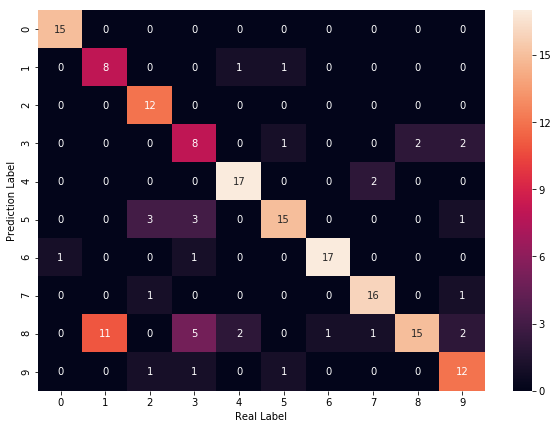

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([15., 10., 12., 13., 19., 22., 19., 18., 37., 15.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:3 index:[1] real:5
#1 min_error:4 index:[3 9] real:2
#2 min_error:3 index:[3] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:1 index:[1] real:1
#5 min_error:4 index:[7] real:7
#6 min_error:1 index:[6] real:6
#7 min_error:2 index:[3] real:3
#8 min_error:3 index:[2] real:2
#9 min_error:0 index:[1] real:1
#10 min_error:4 index:[4 7] real:7
#11 min_error:2 index:[8] real:4
#12 min_error:2 index:[6] real:6
#13 min_error:1 index:[3] real:3
#14 min_error:0 index:[1] real:1
#15 min_error:2 index:[3] real:3
#16 min_error:3 index:[9] real:9
#17 min_error:2 index:[1] real:1
#18 min_error:4 index:[7 8] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:0 index:[8] real:8
#21 min_error:0 index:[4] real:4
#22 min_error:1 index:[3] real:3
#23 min_error:0 index:[1] real:1
#24 min_error:0 index:[4] real:4
#25 min_error:2 index:[0] real:0
#26 min_error:2 index:[5] real:5
#27 min_error:1 index:[3] real:3
#28 min_error:3 index:[6] real:6
#29 min_error:4 index:[7] real:9
#30 min_error:

### part 2. add more classifier

real1 ->4

In [24]:
winner_list_append = []
classes = [[1,3,8,9],[0,1,3,5,7],[0,1,5,6,7],[0,4,7,9],[1,2,6,7,8]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list_append.append(winner)

number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.52198 stdev: 0.09869
Best fitness: 0.73098 - size: (2, 13) - species 3 - id 7
Average adjusted fitness: 0.257
Mean genetic distance 2.955, standard deviation 0.503
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.085 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57071 stdev: 0.09137
Best fitness: 0.73469 - size: (2, 14) - species 17 - id 333
Average adjusted fitness: 0.251
Mean genetic distance 3.026, standard deviation 0.511
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.433 sec (5.259 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57831 stdev: 0.09284
Best fitness: 0.76994 - size: (2, 14) - species 17 - id 537
Average adjusted fitness: 0.241
Mean genetic distance 3.065, standard deviation 0.525
Population of 202 members in 33 species
Total extinctio

Population's average fitness: 0.65598 stdev: 0.08477
Best fitness: 0.79283 - size: (3, 15) - species 17 - id 2126
Average adjusted fitness: 0.271
Mean genetic distance 3.220, standard deviation 0.499
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.924 sec (6.751 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65483 stdev: 0.08652
Best fitness: 0.79283 - size: (3, 15) - species 17 - id 2126
Average adjusted fitness: 0.250
Mean genetic distance 3.220, standard deviation 0.501
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 7.066 sec (6.817 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65029 stdev: 0.08200
Best fitness: 0.79283 - size: (3, 15) - species 17 - id 2126
Average adjusted fitness: 0.249
Mean genetic distance 3.233, standard deviation 0.496
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 7.002 sec (6.862 average)

 ******

Population's average fitness: 0.66244 stdev: 0.08870
Best fitness: 0.84910 - size: (11, 29) - species 3 - id 4402
Average adjusted fitness: 0.285
Mean genetic distance 3.223, standard deviation 0.551
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 8.297 sec (8.024 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.66076 stdev: 0.08683
Best fitness: 0.84910 - size: (11, 29) - species 3 - id 4402
Average adjusted fitness: 0.294
Mean genetic distance 3.240, standard deviation 0.550
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 8.254 sec (8.043 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.65969 stdev: 0.08794
Best fitness: 0.84910 - size: (11, 29) - species 3 - id 4402
Average adjusted fitness: 0.274
Mean genetic distance 3.279, standard deviation 0.543
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 8.252 sec (8.079 average)

 ******

Population's average fitness: 0.67667 stdev: 0.09284
Best fitness: 0.85034 - size: (13, 33) - species 3 - id 10225
Average adjusted fitness: 0.284
Mean genetic distance 3.196, standard deviation 0.581
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 8.431 sec (8.587 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.67912 stdev: 0.09740
Best fitness: 0.85034 - size: (13, 33) - species 3 - id 10225
Average adjusted fitness: 0.361
Mean genetic distance 3.195, standard deviation 0.553
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 8.346 sec (8.590 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.66961 stdev: 0.10593
Best fitness: 0.85034 - size: (13, 33) - species 3 - id 10225
Average adjusted fitness: 0.289
Mean genetic distance 3.195, standard deviation 0.567
Population of 204 members in 21 species
Total extinctions: 0
Generation time: 8.818 sec (8.620 average)

 ***

Population's average fitness: 0.69899 stdev: 0.09877
Best fitness: 0.85034 - size: (13, 33) - species 65 - id 10225
Average adjusted fitness: 0.290
Mean genetic distance 3.157, standard deviation 0.564
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 9.376 sec (9.103 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.70699 stdev: 0.09498
Best fitness: 0.85034 - size: (13, 33) - species 65 - id 10225
Average adjusted fitness: 0.368
Mean genetic distance 3.168, standard deviation 0.558
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 9.855 sec (9.207 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.69533 stdev: 0.09646
Best fitness: 0.85034 - size: (13, 33) - species 65 - id 10225
Average adjusted fitness: 0.269
Mean genetic distance 3.139, standard deviation 0.601
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 9.700 sec (9.294 average)

 

Population's average fitness: 0.59650 stdev: 0.06738
Best fitness: 0.72604 - size: (6, 21) - species 6 - id 2303
Average adjusted fitness: 0.140
Mean genetic distance 3.248, standard deviation 0.485
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 6.791 sec (6.670 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.59635 stdev: 0.07391
Best fitness: 0.72604 - size: (6, 21) - species 6 - id 2303
Average adjusted fitness: 0.241
Mean genetic distance 3.263, standard deviation 0.484
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 6.924 sec (6.718 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.58506 stdev: 0.07238
Best fitness: 0.72604 - size: (6, 21) - species 6 - id 2303
Average adjusted fitness: 0.143
Mean genetic distance 3.277, standard deviation 0.481
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 6.990 sec (6.747 average)

 ****** Ru

Population's average fitness: 0.59630 stdev: 0.07889
Best fitness: 0.73036 - size: (10, 22) - species 48 - id 5614
Average adjusted fitness: 0.212
Mean genetic distance 3.268, standard deviation 0.512
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 7.827 sec (7.678 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.59226 stdev: 0.07661
Best fitness: 0.73036 - size: (10, 22) - species 48 - id 5614
Average adjusted fitness: 0.177
Mean genetic distance 3.303, standard deviation 0.520
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 7.850 sec (7.698 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.59831 stdev: 0.07749
Best fitness: 0.73346 - size: (7, 24) - species 59 - id 5871
Average adjusted fitness: 0.212
Mean genetic distance 3.310, standard deviation 0.510
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 8.402 sec (7.789 average)

 ****

Population's average fitness: 0.61032 stdev: 0.08311
Best fitness: 0.75696 - size: (9, 29) - species 62 - id 8837
Average adjusted fitness: 0.226
Mean genetic distance 3.340, standard deviation 0.578
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 8.701 sec (8.448 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.61079 stdev: 0.07945
Best fitness: 0.75696 - size: (9, 29) - species 62 - id 8837
Average adjusted fitness: 0.221
Mean genetic distance 3.358, standard deviation 0.581
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 8.821 sec (8.543 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.60556 stdev: 0.08165
Best fitness: 0.75696 - size: (9, 29) - species 62 - id 8837
Average adjusted fitness: 0.154
Mean genetic distance 3.368, standard deviation 0.573
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 8.969 sec (8.617 average)

 ******

Population's average fitness: 0.61330 stdev: 0.07652
Best fitness: 0.78169 - size: (9, 28) - species 75 - id 12444
Average adjusted fitness: 0.252
Mean genetic distance 3.229, standard deviation 0.592
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 8.945 sec (8.927 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.61487 stdev: 0.07753
Best fitness: 0.78169 - size: (9, 28) - species 75 - id 12444
Average adjusted fitness: 0.133
Mean genetic distance 3.237, standard deviation 0.569
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 9.195 sec (8.938 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.61033 stdev: 0.08366
Best fitness: 0.78169 - size: (9, 28) - species 75 - id 12444
Average adjusted fitness: 0.185
Mean genetic distance 3.255, standard deviation 0.567
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 9.275 sec (8.973 average)

 ***

Population's average fitness: 0.58078 stdev: 0.07908
Best fitness: 0.72975 - size: (4, 17) - species 47 - id 1727
Average adjusted fitness: 0.271
Mean genetic distance 3.152, standard deviation 0.493
Population of 195 members in 43 species
Total extinctions: 0
Generation time: 6.288 sec (6.329 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58382 stdev: 0.07878
Best fitness: 0.72975 - size: (4, 17) - species 47 - id 1727
Average adjusted fitness: 0.234
Mean genetic distance 3.161, standard deviation 0.493
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 6.422 sec (6.361 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.58533 stdev: 0.07608
Best fitness: 0.73346 - size: (5, 17) - species 47 - id 2449
Average adjusted fitness: 0.138
Mean genetic distance 3.155, standard deviation 0.492
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 6.633 sec (6.404 average)

 ******

Population's average fitness: 0.61563 stdev: 0.08484
Best fitness: 0.77798 - size: (7, 24) - species 29 - id 3715
Average adjusted fitness: 0.258
Mean genetic distance 3.261, standard deviation 0.536
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 7.817 sec (7.801 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.60488 stdev: 0.08738
Best fitness: 0.77798 - size: (7, 24) - species 29 - id 3715
Average adjusted fitness: 0.277
Mean genetic distance 3.250, standard deviation 0.530
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 7.975 sec (7.844 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.60442 stdev: 0.08725
Best fitness: 0.77798 - size: (7, 24) - species 29 - id 3715
Average adjusted fitness: 0.242
Mean genetic distance 3.291, standard deviation 0.548
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 8.035 sec (7.896 average)

 ******

Population's average fitness: 0.62303 stdev: 0.09353
Best fitness: 0.77798 - size: (7, 24) - species 29 - id 3715
Average adjusted fitness: 0.277
Mean genetic distance 3.160, standard deviation 0.519
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 8.093 sec (8.173 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.61735 stdev: 0.08744
Best fitness: 0.77798 - size: (7, 24) - species 29 - id 3715
Average adjusted fitness: 0.165
Mean genetic distance 3.180, standard deviation 0.516
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 8.113 sec (8.191 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.63072 stdev: 0.08712
Best fitness: 0.77798 - size: (7, 24) - species 29 - id 3715
Average adjusted fitness: 0.204
Mean genetic distance 3.190, standard deviation 0.518
Population of 205 members in 20 species
Total extinctions: 0
Generation time: 8.256 sec (8.201 average)

 ******

Population's average fitness: 0.62682 stdev: 0.08978
Best fitness: 0.79159 - size: (13, 35) - species 42 - id 12297
Average adjusted fitness: 0.161
Mean genetic distance 3.104, standard deviation 0.561
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 8.149 sec (8.084 average)

 ****** Running generation 89 ****** 

Population's average fitness: 0.63006 stdev: 0.09309
Best fitness: 0.79159 - size: (13, 35) - species 42 - id 12297
Average adjusted fitness: 0.174
Mean genetic distance 3.110, standard deviation 0.564
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 8.198 sec (8.099 average)

 ****** Running generation 90 ****** 

Population's average fitness: 0.63122 stdev: 0.09325
Best fitness: 0.79159 - size: (13, 35) - species 42 - id 12297
Average adjusted fitness: 0.212
Mean genetic distance 3.124, standard deviation 0.570
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 8.085 sec (8.100 average)

 

Mean genetic distance 3.154, standard deviation 0.490
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 6.324 sec (6.203 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65260 stdev: 0.10396
Best fitness: 0.86209 - size: (7, 17) - species 13 - id 1368
Average adjusted fitness: 0.315
Mean genetic distance 3.172, standard deviation 0.491
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 6.597 sec (6.291 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64743 stdev: 0.11408
Best fitness: 0.86209 - size: (7, 17) - species 13 - id 1368
Average adjusted fitness: 0.487
Mean genetic distance 3.176, standard deviation 0.493
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 6.772 sec (6.375 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.65361 stdev: 0.11115
Best fitness: 0.86209 - size: (7, 17) - species 13 - id 1368


Total extinctions: 0
Generation time: 7.502 sec (7.520 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.67201 stdev: 0.11572
Best fitness: 0.87693 - size: (11, 29) - species 13 - id 4958
Average adjusted fitness: 0.324
Mean genetic distance 3.256, standard deviation 0.567
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 7.577 sec (7.565 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.67083 stdev: 0.10580
Best fitness: 0.87693 - size: (11, 29) - species 13 - id 4958
Average adjusted fitness: 0.319
Mean genetic distance 3.204, standard deviation 0.568
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 7.721 sec (7.593 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.67430 stdev: 0.11290
Best fitness: 0.87693 - size: (11, 29) - species 13 - id 4958
Average adjusted fitness: 0.321
Mean genetic distance 3.212, standard deviation 0.563
Popul

Population's average fitness: 0.67533 stdev: 0.11663
Best fitness: 0.87693 - size: (11, 29) - species 13 - id 4958
Average adjusted fitness: 0.284
Mean genetic distance 3.250, standard deviation 0.590
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 8.265 sec (8.100 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.67548 stdev: 0.11630
Best fitness: 0.87693 - size: (11, 29) - species 13 - id 4958
Average adjusted fitness: 0.335
Mean genetic distance 3.274, standard deviation 0.594
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 8.318 sec (8.158 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.68020 stdev: 0.11195
Best fitness: 0.87693 - size: (11, 29) - species 13 - id 4958
Average adjusted fitness: 0.297
Mean genetic distance 3.227, standard deviation 0.595
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 8.401 sec (8.215 average)

 ***

Population's average fitness: 0.68336 stdev: 0.13955
Best fitness: 0.88806 - size: (8, 26) - species 40 - id 12890
Average adjusted fitness: 0.407
Mean genetic distance 3.228, standard deviation 0.580
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 9.439 sec (9.302 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.69165 stdev: 0.13117
Best fitness: 0.88806 - size: (8, 26) - species 40 - id 12890
Average adjusted fitness: 0.311
Mean genetic distance 3.191, standard deviation 0.568
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 9.471 sec (9.265 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.68962 stdev: 0.11764
Best fitness: 0.88806 - size: (8, 26) - species 40 - id 12890
Average adjusted fitness: 0.315
Mean genetic distance 3.193, standard deviation 0.578
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 9.443 sec (9.303 average)

 ***

Mean genetic distance 3.234, standard deviation 0.506
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 7.249 sec (6.944 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.63410 stdev: 0.10158
Best fitness: 0.81262 - size: (7, 21) - species 29 - id 3546
Average adjusted fitness: 0.196
Mean genetic distance 3.229, standard deviation 0.513
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 7.064 sec (6.988 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.65128 stdev: 0.10227
Best fitness: 0.81262 - size: (7, 21) - species 29 - id 3546
Average adjusted fitness: 0.317
Mean genetic distance 3.259, standard deviation 0.499
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.128 sec (7.043 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.64358 stdev: 0.10053
Best fitness: 0.81262 - size: (7, 21) - species 29 - id 3546


Mean genetic distance 3.212, standard deviation 0.588
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 8.425 sec (7.943 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.64772 stdev: 0.10878
Best fitness: 0.82931 - size: (11, 29) - species 47 - id 8120
Average adjusted fitness: 0.213
Mean genetic distance 3.242, standard deviation 0.562
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 8.320 sec (8.030 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.64745 stdev: 0.11052
Best fitness: 0.82931 - size: (11, 29) - species 47 - id 8120
Average adjusted fitness: 0.233
Mean genetic distance 3.232, standard deviation 0.592
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 8.144 sec (8.086 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.66135 stdev: 0.10777
Best fitness: 0.82931 - size: (11, 29) - species 47 - id 81

Mean genetic distance 3.177, standard deviation 0.571
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 9.012 sec (8.762 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.64211 stdev: 0.11886
Best fitness: 0.84787 - size: (8, 21) - species 50 - id 11165
Average adjusted fitness: 0.265
Mean genetic distance 3.135, standard deviation 0.523
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 8.824 sec (8.804 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.65227 stdev: 0.11428
Best fitness: 0.84787 - size: (8, 21) - species 50 - id 11165
Average adjusted fitness: 0.313
Mean genetic distance 3.172, standard deviation 0.523
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 8.653 sec (8.836 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.65857 stdev: 0.10908
Best fitness: 0.84787 - size: (8, 21) - species 50 - id 111

In [25]:
appended_winner_list = winner_list + winner_list_append

In [26]:
appended_number_codes = [[1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,1,1,0],
[0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,1,1,1,0,1],
[1,0,0,1,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1],
[0,0,1,1,0,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0],
[1,1,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0],
[0,1,0,0,1,1,0,1,1,1,0,0,0,0,1,0,1,1,0,0],
[1,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1],
[0,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1],
[1,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,0,0,0,1],
[0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,1,0,0,1,0]]

In [27]:
classes = [[0,2,4,6,8],[0,4,5,8,9],[1,3,4,6,9],[1,2,3,6,7,8,9],[1,4,5,6,7],[1,3,5,7,8],[0,3,4,7,8],[1,2,3,4,5],[0,2,5,7,9],[1,2,5,6,8],[1,2,4,7,9],[0,6,7],[0,2,3],[1,8,9],[0,2,3,4,5,6,7,8,9]] + classes



In [9]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(appended_winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [29]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(20):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(20 - np.sum(appended_number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [30]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:4 index:[1] real:5
#1 min_error:5 index:[2] real:2
#2 min_error:4 index:[8] real:8
#3 min_error:1 index:[0] real:0
#4 min_error:2 index:[1] real:1
#5 min_error:5 index:[7] real:7
#6 min_error:2 index:[6] real:6
#7 min_error:2 index:[3] real:3
#8 min_error:3 index:[2] real:2
#9 min_error:1 index:[1] real:1
#10 min_error:4 index:[7] real:7
#11 min_error:3 index:[8] real:4
#12 min_error:2 index:[6] real:6
#13 min_error:1 index:[3] real:3
#14 min_error:1 index:[1] real:1
#15 min_error:2 index:[3] real:3
#16 min_error:5 index:[9] real:9
#17 min_error:3 index:[1] real:1
#18 min_error:6 index:[7 8] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:3 index:[8] real:8
#21 min_error:0 index:[4] real:4
#22 min_error:1 index:[3] real:3
#23 min_error:1 index:[1] real:1
#24 min_error:1 index:[4] real:4
#25 min_error:2 index:[0] real:0
#26 min_error:3 index:[5] real:5
#27 min_error:1 index:[3] real:3
#28 min_error:3 index:[6] real:6
#29 min_error:5 index:[9] real:9
#30 min_error:5 in

In [31]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
        
np.sum(list_P == digits.target[1617:])/180

0.7833333333333333

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  1  1  1  0  0  1  1]
 [ 0  0 15  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  1  4]
 [ 0  0  0  0 17  1  0  4  0  0]
 [ 0  0  2  5  0 16  0  0  1  1]
 [ 0  1  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  8  0  3  2  0  0  0 14  0]
 [ 0  0  0  1  0  0  0  0  0 12]]


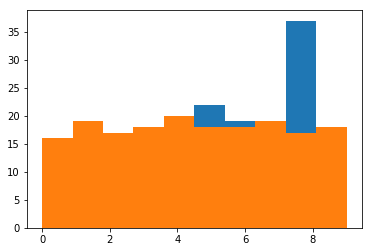

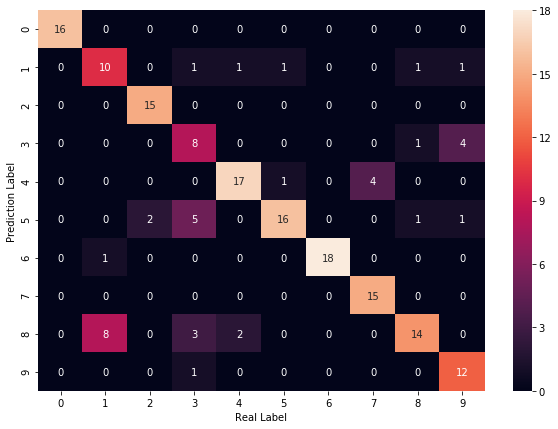

In [33]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [34]:
## 加一个confusion matrix 将容易出错的两个数字增加分类！！！！比如 8 和6 容易分错，设计一个code 将8 和6 分成两类

In [35]:
## 分别绘制15个分类器的准确率随着训练的变化，有可能ecoc 的还比他们都高哈哈哈

In [4]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(15 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

In [7]:
np.min(matrix_errors)

7